<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objective---Distribution-of-Expression-Effects-(DEE)" data-toc-modified-id="Objective---Distribution-of-Expression-Effects-(DEE)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objective - Distribution of Expression Effects (DEE)</a></span></li><li><span><a href="#Keys" data-toc-modified-id="Keys-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Keys</a></span></li><li><span><a href="#Gamma-distribution" data-toc-modified-id="Gamma-distribution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Gamma distribution</a></span></li><li><span><a href="#Probability-max-function" data-toc-modified-id="Probability-max-function-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Probability max function</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Negative-Binomial-distribution" data-toc-modified-id="Negative-Binomial-distribution-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Negative Binomial distribution</a></span></li><li><span><a href="#Gamma-distribution" data-toc-modified-id="Gamma-distribution-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Gamma distribution</a></span></li><li><span><a href="#Negative-Binomial-+-(0-degs)-distribution" data-toc-modified-id="Negative-Binomial-+-(0-degs)-distribution-4.0.3"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>Negative Binomial + (0 degs) distribution</a></span></li><li><span><a href="#Gamma-+-(0-degs)-distribution" data-toc-modified-id="Gamma-+-(0-degs)-distribution-4.0.4"><span class="toc-item-num">4.0.4&nbsp;&nbsp;</span>Gamma + (0 degs) distribution</a></span></li><li><span><a href="#Gamma-+-(0-degs-+-1-degs)-distribution" data-toc-modified-id="Gamma-+-(0-degs-+-1-degs)-distribution-4.0.5"><span class="toc-item-num">4.0.5&nbsp;&nbsp;</span>Gamma + (0 degs + 1 degs) distribution</a></span></li></ul></li><li><span><a href="#Simulations" data-toc-modified-id="Simulations-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Simulations</a></span><ul class="toc-item"><li><span><a href="#Defining-functions" data-toc-modified-id="Defining-functions-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Defining functions</a></span></li><li><span><a href="#Running-functions---with-mutators" data-toc-modified-id="Running-functions---with-mutators-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Running functions - with mutators</a></span></li><li><span><a href="#Confirming-strong-correlations-between-simulated-and-estimated-data" data-toc-modified-id="Confirming-strong-correlations-between-simulated-and-estimated-data-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Confirming strong correlations between simulated and estimated data</a></span></li></ul></li></ul></li><li><span><a href="#Probabilistic-model-selection" data-toc-modified-id="Probabilistic-model-selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Probabilistic model selection</a></span><ul class="toc-item"><li><span><a href="#Akaike-information-criterion-(AIC)" data-toc-modified-id="Akaike-information-criterion-(AIC)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Akaike information criterion (AIC)</a></span></li><li><span><a href="#Bayesian-information-criterion-(BIC)" data-toc-modified-id="Bayesian-information-criterion-(BIC)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Bayesian information criterion (BIC)</a></span></li></ul></li><li><span><a href="#Plots-of-estimated-DEE" data-toc-modified-id="Plots-of-estimated-DEE-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Plots of estimated DEE</a></span><ul class="toc-item"><li><span><a href="#Negative-binomial-distribution" data-toc-modified-id="Negative-binomial-distribution-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Negative binomial distribution</a></span></li><li><span><a href="#Gamma-distribution-(loc-=-0)" data-toc-modified-id="Gamma-distribution-(loc-=-0)-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Gamma distribution (loc = 0)</a></span></li><li><span><a href="#Two-distributions" data-toc-modified-id="Two-distributions-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Two distributions</a></span></li><li><span><a href="#Three-distributions" data-toc-modified-id="Three-distributions-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Three distributions</a></span></li><li><span><a href="#Simulating-the-average-DEG-count-based-on-gamma-distribution" data-toc-modified-id="Simulating-the-average-DEG-count-based-on-gamma-distribution-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Simulating the average DEG count based on gamma distribution</a></span></li><li><span><a href="#Correlation-between-simulated-mutation-and-DEG-count" data-toc-modified-id="Correlation-between-simulated-mutation-and-DEG-count-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Correlation between simulated mutation and DEG count</a></span></li></ul></li></ul></div>

# Objective - Distribution of Expression Effects (DEE)

The aim of this notebook is to find a distribution that infers the number of DEGs introduced by X mutations

# Keys

In [1]:
import math
import scipy
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.multicomp
import statsmodels.formula.api as smf
from scipy import stats
from numpy import log as ln
from scipy.stats import gamma
from scipy.stats import nbinom
from scipy.stats import pearsonr
from scipy.optimize import minimize
from scipy.optimize import dual_annealing
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
%load_ext rpy2.ipython

# Gamma distribution

This section explores:
- Verifying that the parameter loc shifts the entire distribution as expected
- Understanding how to shift a distribution assuming loc = 0 (distribution includes the origin)
- Understanding how to transform a gamma distribution such that the x axis represents the total DEGs given "n" draws (i.e. mutations) from the distribution
    - Given by g = scipy.stats.gamma(a*n, loc = c, scale=b), c is the shift

In [22]:
###############
#### NOTES ####
###############
# a = shape of gamma distribution (parameter)
# n = number of mutations (variable)
# loc = translational shift of distribution
# deg = number of degs (variable)
# pdf = probability density function, which provides the total probability of getting "deg" assuming "n" draws for given distribution

## For transformed distribution (i.e. a*n) loc = 0, pdf (deg - n) IS EQUAL TO loc = n, pdf(deg)

##################################################
#### Testing this logic for all mut,deg pairs ####
##################################################
all_mutations = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/all_mutations.csv', delimiter = '\t')
DEGs = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/total_genes1.csv', delimiter = ',')

mutdegs = []
for i in all_mutations['sample'].unique():
    mutations = all_mutations.loc[all_mutations['sample'] == i].count()[0]
    mutdegs.append((mutations, DEGs[i].count())) ## creating list of mutation & deg pair

probs = [] ## list of probability of finding each mutation, deg pair in a gamma distribution
for pair in mutdegs:
    g = scipy.stats.gamma(2*pair[0], loc = 2, scale = 200)
    probs.append(g.pdf(pair[1]))

probs1 = []
for pair in mutdegs:
    g = scipy.stats.gamma(2*pair[0], loc = 0, scale = 200)
    probs1.append(g.pdf(pair[1] - 2))

display(pearsonr(probs1, probs)) 

##################################################################################################################
#### Testing the conditions such that the untransformed distribution is EQUAL TO the transformed distribution ####
##################################################################################################################
count = []
simulations = 1000000

#### Untransformed distribution
g = stats.gamma(0.009, loc = 1, scale = 200)
for i in range(simulations):
    count.append(round(g.rvs(size = 25).sum(), 0))
display(count.count(100)/simulations)

h = stats.gamma(0.009, loc = 0, scale = 200)
for i in range(simulations):
    count.append(round(h.rvs(size = 25).sum(), 0))
display(count.count(100 - 25)/simulations)

#### Tranformed distribution ####
e = stats.gamma(0.009*25, loc = 25, scale = 200)
display(e.pdf(100))

f = stats.gamma(0.009*25, loc = 0, scale = 200)
display(f.pdf(100 - 25))

# Verify that g = h = e = f

In [2]:
###############
#### NOTES ####
###############
# a = shape of gamma distribution (parameter)
# n = number of mutations (variable)
# loc = translational shift of distribution
# deg = number of degs (variable)
# pdf = probability density function, which provides the total probability of getting "deg" assuming "n" draws for given distribution

## For transformed distribution (i.e. a*n) loc = 0, pdf (deg - n) IS EQUAL TO loc = n, pdf(deg)

##################################################
#### Testing this logic for all mut,deg pairs ####
##################################################
all_mutations = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/all_mutations.csv', delimiter = '\t')
DEGs = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/total_genes1.csv', delimiter = ',')

mutdegs = []
for i in all_mutations['sample'].unique():
    mutations = all_mutations.loc[all_mutations['sample'] == i].count()[0]
    mutdegs.append((mutations, DEGs[i].count())) ## creating list of mutation & deg pair

##################################################################################################################
#### Testing the conditions such that the untransformed distribution is EQUAL TO the transformed distribution ####
##################################################################################################################
count = []
simulations = 100000

for i in mutdegs:
    #### Untransformed distribution ####
    g = stats.nbinom(0.105, 0.0118, loc = 1)
    for a in range(simulations):
        count.append(g.rvs(size = i[0]).sum())
    display(count.count(i[1])/simulations)

    count = []
    h = stats.nbinom(0.105, 0.0118, loc = 0)
    for a in range(simulations):
        count.append(h.rvs(size = i[0]).sum())
    display(count.count(i[1] - i[0])/simulations)

    #### Tranformed distribution ####
    e = stats.nbinom(0.105*i[0], 0.0118, loc = i[0])
    display(e.pmf(i[1]))

    f = stats.nbinom(0.105*i[0], 0.0118, loc = 0)
    display(f.pmf(i[1] - i[0]))

# # Verify that g = h = e = f

0.00054

0.00036

0.0003826098880429026

0.0003826098880429026

1e-05

2e-05

2.1612395945497498e-05

2.1612395945497498e-05

0.0

0.0

2.0965398647414214e-19

2.0965398647414214e-19

1e-05

0.0

5.06036529634879e-06

5.06036529634879e-06

0.0

0.0

3.8153267874843093e-07

3.8153267874843093e-07

0.0

0.0

0.0

0.0

0.0

0.0

3.47638905028283e-13

3.47638905028283e-13

0.00137

0.0

1.040141463996561e-05

1.040141463996561e-05

0.0

0.0

0.0

0.0

0.0

0.0

3.966006840707683e-11

3.966006840707683e-11

0.00278

3e-05

2.2379552800822906e-05

2.2379552800822906e-05

0.0

0.0

7.677228377974558e-12

7.677228377974558e-12

9e-05

0.0

0.0

0.0

5e-05

0.0

0.0

0.0

0.0

0.0

3.9634913785941877e-23

3.9634913785941877e-23

9e-05

9e-05

8.576850518482962e-05

8.576850518482962e-05

1e-05

0.0

3.0138635972560236e-07

3.0138635972560236e-07

1e-05

0.0

2.170211944928606e-06

2.170211944928606e-06

0.00221

0.00071

0.0007661982383033439

0.0007661982383033439

1e-05

0.0

7.240791534028103e-06

7.240791534028103e-06

0.0

0.0

3.724092412926012e-06

3.724092412926012e-06

0.00028

5e-05

9.263516542980303e-05

9.263516542980303e-05

0.00205

0.00212

0.00194916317161044

0.00194916317161044

0.00057

0.00048

0.0005011952680030734

0.0005011952680030734

0.001

0.0

2.1376819658830628e-14

2.1376819658830628e-14

0.00074

0.0

5.68115252292967e-10

5.68115252292967e-10

0.00084

0.00043

0.0004313332613252408

0.0004313332613252408

0.00107

0.0

1.96004058182213e-06

1.96004058182213e-06

# Probability max function

General equation that will be employed

In [ ]:
# a=0.4 #shape 
# b=5   #scale 
# n=25  #mutations
# D=37 #DEGs
# g = scipy.stats.gamma(a*n, loc=0, scale=b)

# print(g.pdf(D))

### Negative Binomial distribution

In [92]:
def probability_max(a):
    "' Probability of multiple mutation and deg pairs given a gamma distribution. The input a = (shape, scale)'"
    
    all_mutations = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/all_mutations.csv', delimiter = '\t')
    DEGs = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/total_genes1.csv', delimiter = ',')
    
    mutdegs = []
    for i in all_mutations['sample'].unique():
        mutations = all_mutations.loc[all_mutations['sample'] == i].count()[0]
        mutdegs.append((mutations, DEGs[i].count())) ## creating list of mutation & deg pair
        
    # a[0] = number of successes
    # a[1] = probability of a success

    probs = [] ## list of probability of finding each mutation, deg pair in a gamma distribution
    for pair in mutdegs:
        g = scipy.stats.nbinom(a[0]*pair[0], a[1], loc = 0)
        probs.append(g.pmf(pair[1]))
    if len(probs) != 0:
        return -np.prod(probs)

In [93]:
bounds = [(0, 1000), (0, 1)]
ret = dual_annealing(probability_max, bounds, maxiter = 3000, initial_temp = 1000)
print(ret.x)
print(-ret['fun'])
print(ret.nfev)

[93.97722035  0.72505669]
0.0
15015


### Gamma distribution

Assuming a gamma distribution, we find the parameters that best suites the 28 (mut, degs) pairs given

In [2]:
def probability_max(a):
    "' Probability of multiple mutation and deg pairs given a gamma distribution. The input a = (shape, scale)'"
    
    all_mutations = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/all_mutations.csv', delimiter = '\t')
    DEGs = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/total_genes1.csv', delimiter = ',')
    
    mutdegs = []
    for i in all_mutations['sample'].unique():
        mutations = all_mutations.loc[all_mutations['sample'] == i].count()[0]
        mutdegs.append((mutations, DEGs[i].count())) ## creating list of mutation & deg pair

    probs = [] ## list of probability of finding each mutation, deg pair in a gamma distribution
    for pair in mutdegs:
        g = scipy.stats.gamma(a[0]*pair[0], loc = 0, scale = a[1])
        probs.append(g.pdf(pair[1]))
    if len(probs) != 0:
        return -np.prod(probs)

In [3]:
bounds = [(0.0084, 0.0086), (1760, 1770)]
ret = dual_annealing(probability_max, bounds, maxiter = 3000, initial_temp = 1)
print(ret.x)
print(-ret['fun'])
print(ret.nfev)

[8.52336621e-03 1.76850595e+03]
2.8628927049306923e-102
14046


In [4]:
def probability_max_nomutators(a):
    "' Probability of multiple mutation and deg pairs given a gamma distribution. The input a = (shape, scale). Mutators have been excluded.'"
    
    all_mutations = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/all_mutations.csv', delimiter = '\t')
    all_mutations = all_mutations.loc[~all_mutations['sample'].isin(['CC2344-L1', 'CC2931-L5'])] ##excluding mutators
    DEGs = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/total_genes1.csv', delimiter = ',')
    
    mutdegs = []
    for i in all_mutations['sample'].unique():
        mutations = all_mutations.loc[all_mutations['sample'] == i].count()[0]
        mutdegs.append((mutations, DEGs[i].count())) ## creating list of mutation & deg pair

    probs = [] ## list of probability of finding each mutation, deg pair in a gamma distribution
    for pair in mutdegs:
        g = scipy.stats.gamma(a[0]*pair[0], loc = 0, scale = a[1])
        probs.append(g.pdf(pair[1]))
    if len(probs) != 0:
        return -np.prod(probs)

In [9]:
bounds = [(0.00983, 0.009835), (1906, 1909)]
ret = dual_annealing(probability_max_nomutators, bounds, maxiter = 3000, initial_temp = 5)
print(ret.x)
print(-ret['fun'])
print(ret.nfev)

[9.83000802e-03 1.90699189e+03]
6.513942016827533e-94
12552


### Negative Binomial + (0 degs) distribution

Assuming the combination of two distributions, uniform (0 degs), and negative binomial distribution

In [7]:
def probability_max2(a):
    "' Probability of multiple mutation and deg pairs given a gamma and uniform (0 degs) distribution. The input represents a = (shape, scale, prop0)'"
    
    all_mutations = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/all_mutations.csv', delimiter = '\t')
    DEGs = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/total_genes1.csv', delimiter = ',')

    ## Creating a list of mutation, number of degs pairs ##
    mutdegs = []
    for i in all_mutations['sample'].unique():
        mutations = all_mutations.loc[all_mutations['sample'] == i].count()[0]
        mutdegs.append((mutations, DEGs[i].count())) ## creating list of mutation & deg pair
        
    probs = [] ## list of probability of finding each mutation, deg pair in a gamma distribution
    for pair in mutdegs:
        rem_mut = pair[0] - a[2]*pair[0]
        degs = pair[1]
        g = scipy.stats.nbinom(a[0]*rem_mut, a[1], loc = rem_mut)
        g_pmf = g.pmf(degs)
        probs.append(g_pmf)
    if len(probs) != 0:
        return -np.prod(probs)

In [19]:
bounds = [(0, 500), (0, 500), (0.3, 1)]
ret = dual_annealing(probability_max2, bounds, maxiter = 1000, initial_temp = 1000)
print(ret.x)
print(-ret['fun'])
print(ret.nfev)

[229.78616323 131.11130366   0.30638832]
nan
6431


### Gamma + (0 degs) distribution

Assuming the combination of two distributions, uniform (0 degs), and gamma distribution

In [95]:
def probability_max2(a):
    "' Probability of multiple mutation and deg pairs given a gamma and uniform (0 degs) distribution. The input represents a = (shape, scale, prop0)'"
    
    all_mutations = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/all_mutations.csv', delimiter = '\t')
    DEGs = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/total_genes1.csv', delimiter = ',')

    ## Creating a list of mutation, number of degs pairs ##
    mutdegs = []
    for i in all_mutations['sample'].unique():
        mutations = all_mutations.loc[all_mutations['sample'] == i].count()[0]
        mutdegs.append((mutations, DEGs[i].count())) ## creating list of mutation & deg pair
        
#     a[0] # shape
#     a[1] # scale
#     a[2] # proportion of mutations that cause 0 degs

    probs = [] ## list of probability of finding each mutation, deg pair in a gamma distribution
    for pair in mutdegs:
        rem_mut = pair[0] - a[2]*pair[0]
        degs = pair[1]
        g = scipy.stats.gamma(a[0]*round(rem_mut, 0), loc = round(rem_mut, 0), scale = a[1])
        g_pdf = g.pdf(degs)
        probs.append(g_pdf)
    if len(probs) != 0:
        return -np.prod(probs)

In [100]:
bounds = [(0, 0.02), (1790, 1830), (0.50, 0.54)]
ret = dual_annealing(probability_max2, bounds, maxiter = 2000, initial_temp = 100)
print(ret.x)
print(-ret['fun'])
print(ret.nfev)

[1.51952400e-02 1.81694829e+03 5.04860841e-01]
1.023194063552528e-100
12038


In [ ]:
[1.17992891e-02 2.00499698e+03 4.20446672e-01]
1.050482039705783e-99
12518

In [87]:
def probability_max2(a):
    "' Probability of multiple mutation and deg pairs given a gamma and uniform (0 degs) distribution. The input represents a = (shape, scale, prop0)'"
    
    all_mutations = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/all_mutations.csv', delimiter = '\t')
    DEGs = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/total_genes1.csv', delimiter = ',')

    ## Creating a list of mutation, number of degs pairs ##
    mutdegs = []
    for i in all_mutations['sample'].unique():
        mutations = all_mutations.loc[all_mutations['sample'] == i].count()[0]
        mutdegs.append((mutations, DEGs[i].count())) ## creating list of mutation & deg pair
        
#     a[0] # shape
#     a[1] # scale
#     a[2] # proportion of mutations that cause 0 degs

    probs = [] ## list of probability of finding each mutation, deg pair in a gamma distribution
    for pair in mutdegs:
        rem_mut = pair[0] - 0.8*pair[0]
        degs = pair[1]
        g = scipy.stats.gamma(a[0]*round(rem_mut, 0), loc = round(rem_mut, 0), scale = a[1])
        g_pdf = g.pdf(degs)
        probs.append(g_pdf)
    if len(probs) != 0:
        return -np.prod(probs)

In [88]:
bounds = [(0, 0.1), (1800, 2100)]
ret = dual_annealing(probability_max2, bounds, maxiter = 3000, initial_temp = 1000)
print(ret.x)
print(-ret['fun'])
print(ret.nfev)

[4.03892946e-02 1.84651435e+03]
8.457415865148223e-102
14967


In [2]:
def probability_max2_nomutators(a):
    "' Probability of multiple mutation and deg pairs given a gamma and uniform (0 degs) distribution. The input represents a = (shape, scale, prop0)'"
    
    all_mutations = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/all_mutations.csv', delimiter = '\t')
    all_mutations = all_mutations.loc[~all_mutations['sample'].isin(['CC2344-L1', 'CC2931-L5'])] ##excluding mutators
    
    DEGs = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/total_genes1.csv', delimiter = ',')

    ## Creating a list of mutation, number of degs pairs ##
    mutdegs = []
    for i in all_mutations['sample'].unique():
        mutations = all_mutations.loc[all_mutations['sample'] == i].count()[0]
        mutdegs.append((mutations, DEGs[i].count())) ## creating list of mutation & deg pair
        
#     a[0] # shape
#     a[1] # scale
#     a[2] # proportion of mutations that cause 0 degs

    probs = [] ## list of probability of finding each mutation, deg pair in a gamma distribution
    for pair in mutdegs:
        rem_mut = pair[0] - a[2]*pair[0]
        degs = pair[1]
        g = scipy.stats.gamma(a[0]*round(rem_mut, 0), loc = round(rem_mut, 0), scale = a[1])
        g_pdf = g.pdf(degs)
        probs.append(g_pdf)
    if len(probs) != 0:
        return -np.prod(probs)

In [ ]:
# [1.54022103e-02 2.24740429e+03 4.20243014e-01]
bounds = [(0.01535, 0.0155), (2246, 2248), (0.415, 0.43)]
ret = dual_annealing(probability_max2_nomutators, bounds, maxiter = 4000, initial_temp = 10)
print(ret.x)
print(-ret['fun'])
print(ret.nfev)

In [ ]:
[1.54022103e-02 2.24740429e+03 4.20243014e-01]
9.235913113513746e-92
20635

### Gamma + (0 degs + 1 degs) distribution

Assuming the combination of three distributions, uniform (0 degs), uniform (1 degs), and gamma distribution

In [2]:
def probability_max3(a):
    "' Probability of multiple mutation and deg pairs given a gamma distribution and two uniform (0 degs + 1 degs). The input a = (shape, scale, prop0, prop1)'"
    
    all_mutations = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/all_mutations.csv', delimiter = '\t')
    DEGs = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/total_genes1.csv', delimiter = ',')

    ## Creating a list of mutation, number of degs pairs ##
    mutdegs = []
    for i in all_mutations['sample'].unique():
        mutations = all_mutations.loc[all_mutations['sample'] == i].count()[0]
        mutdegs.append((mutations, DEGs[i].count())) ## creating list of mutation & deg pair
        
#     a[0] # shape
#     a[1] # scale
#     a[2] # proportion of mutations that cause 0 degs
#     a[3] # proportion of mutations that cause 1 deg (~cis)

    probs = [] ## list of probability of finding each mutation, deg pair in a gamma distribution
    for pair in mutdegs:
        rem_mut = pair[0] - pair[0]*a[2] - pair[0]*a[3]
        rem_degs = pair[1] - a[3]*pair[0]
        g = scipy.stats.gamma(a[0]*round(rem_mut, 0), loc = 2*round(rem_mut, 0), scale = a[1])
        g_pdf = g.pdf(round(rem_degs, 0))
        probs.append(g_pdf)
    if len(probs) != 0:
        return -np.prod(probs)

In [ ]:
from scipy.optimize import dual_annealing
bounds = [(0, 0.1), (2100, 2700), (0.5, 0.7), (0, 0.5)]
ret = dual_annealing(probability_max3, bounds, maxiter = 2000, initial_temp = 1000)
print(ret.x)
print(-ret['fun'])
print(ret.nfev)

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumer

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encounte

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumer

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumer

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumer

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumer

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumer

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumer

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumer

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in sub

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) 

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in sub

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numd

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in sub

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumer

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encoun

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numd

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: R

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumer

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) 

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numd

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encoun

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in sub

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) 

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/e

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) 

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: R

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numd

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) 

In [2]:
from scipy.optimize import dual_annealing
bounds = [(0.01, 0.03), (2100, 2200), (0.6, 0.7), (0, 0.1)]
ret = dual_annealing(probability_max3, bounds, maxiter = 1000, initial_temp = 100)
print(ret.x)
print(-ret['fun'])
print(ret.nfev)

In [151]:
[2.7e-02, 2.2e+03, 6.56e-01, 9.82369846e-02]
1.2405754922100636e-99

-1.040780366065886e-99

In [2]:
def probability_max3_nomutators(a):
    "' Probability of multiple mutation and deg pairs given a gamma distribution and two uniform (0 degs + 1 degs). The input a = (shape, scale, prop0, prop1)'"
    
    all_mutations = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/all_mutations.csv', delimiter = '\t')
    all_mutations = all_mutations.loc[~all_mutations['sample'].isin(['CC2344-L1', 'CC2931-L5'])] ##excluding mutators
    
    DEGs = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/total_genes1.csv', delimiter = ',')

    ## Creating a list of mutation, number of degs pairs ##
    mutdegs = []
    for i in all_mutations['sample'].unique():
        mutations = all_mutations.loc[all_mutations['sample'] == i].count()[0]
        mutdegs.append((mutations, DEGs[i].count())) ## creating list of mutation & deg pair
        
#     a[0] # shape
#     a[1] # scale
#     a[2] # proportion of mutations that cause 0 degs
#     a[3] # proportion of mutations that cause 1 deg (~cis)

    probs = [] ## list of probability of finding each mutation, deg pair in a gamma distribution
    for pair in mutdegs:
        rem_mut = pair[0] - pair[0]*a[2] - pair[0]*a[3]
        rem_degs = pair[1] - a[3]*pair[0]
        g = scipy.stats.gamma(a[0]*round(rem_mut, 0), loc = 2*round(rem_mut, 0), scale = a[1])
        g_pdf = g.pdf(round(rem_degs, 0))
        probs.append(g_pdf)
    if len(probs) != 0:
        return -np.prod(probs)

In [19]:
from scipy.optimize import dual_annealing
bounds = [(0, 1), (1800, 3000), (0.5, 0.7), (0, 0.5)]
ret = dual_annealing(probability_max3_nomutators, bounds, maxiter = 1000, initial_temp = 50)
print(ret.x)
print(-ret['fun'])
print(ret.nfev)

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/balogu15/.conda/envs/personal/lib/python3

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumer

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumer

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumer

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: Runti

[5.57386114e-02 2.85746196e+03 5.51141020e-01 3.17508284e-01]
inf
8121


/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)
/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/scipy/optimize/_dual_annealing.py:268: RuntimeWarning: invalid value encountered in double_scalars
  (e - self.energy_state.current_energy) / self.temperature_step)


In [ ]:
[3.04876558e-02 2.25398160e+03 6.53658650e-01 9.97927889e-02]
2.1397238323940378e-91
26458

## Simulations

Validating the parameters for the DEE using simulations

### Defining functions

In [23]:
def sim_gamma(a, b, mut, deg, simulations):
    '" Provides the probability of getting x degs given y mutations using a gamma distribution with the parameters a, b"'
    prob = []
    for i in range(simulations):
        degs = 0
        dist = gamma.rvs(a, loc = 0, scale = b, size = mut)
        degs += round(dist.sum(), 0)
        prob.append(degs)
    return prob.count(deg)/simulations

def sim2(a, b, prop0, mut, deg, simulations):
    '" Provides the probability of getting x degs given y mutations using a combination of two distributions, a uniform for 0 DEG and one gamma distributions"'
    prob = []
    for i in range(simulations):
        rem_mut = mut - mut*prop0
        dist = gamma.rvs(a, loc = 1, scale = b, size = int(round(rem_mut, 0)))
        degs = round(dist.sum(), 0)
        prob.append(degs)
    return (prob.count(deg)/simulations)

def sim3(a, b, prop0, prop1, mut, deg, simulations):
    '" Provides the probability of getting x degs given y mutations using a combination of three distributions, two uniform for 0 and 1 DEG and one gamma distributions"'
    prob = []
    for i in range(simulations):
        degs = 0
        rem_mut = mut - mut*prop0 - mut*prop1
        degs += round(mut*prop1, 0)
        dist = gamma.rvs(a, loc = 2, scale = b, size = int(round(rem_mut, 0)))
        degs += round(dist.sum(), 0)
        prob.append(degs)
    return (prob.count(deg)/simulations)

### Running functions - with mutators

In [30]:
all_mutations = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/all_mutations.csv', delimiter = '\t')
DEGs = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/total_genes1.csv', delimiter = ',')

## Creating a list of mutation, number of degs pairs ##
mutdegs = []
for i in all_mutations['sample'].unique():
    mutations = all_mutations.loc[all_mutations['sample'] == i].count()[0]
    mutdegs.append((mutations, DEGs[i].count())) ## creating list of mutation & deg pair
    
##################################################################################################################################

############################
#### Gamma distribution ####
############################
simulations = 1000000
shape = 8.52497115e-03
scale = 1.76809511e+03

total_probability = []
for pair in mutdegs:
    result = sim_gamma(shape, scale, pair[0], pair[1], simulations)
    total_probability.append(result)
    print(result)

probability = pd.DataFrame()
probability['mutations'] = [i[0] for i in mutdegs]
probability['degs'] = [i[1] for i in mutdegs]
probability['simulated_gamma'] = total_probability
probability['given_gamma'] = probability_max((shape, scale))[1] # Note, that this function was changed to include the list of individual (mut, deg) probabilities

###############################################
#### Gamma distribution + 1 uniform (deg0) ####
###############################################
shape = 1.17992891e-02
scale = 2.00499698e+03
prop0 = 4.20446672e-01

total_probability2 = []
for pair in mutdegs:
    result = sim2(shape, scale, prop0, pair[0], pair[1], simulations)
    total_probability2.append(result)
    print(result)

probability['simulated_gamma_deg0'] = total_probability2
probability['given_gamma_deg0'] = probability_max2((shape, scale, prop0))[1]

####################################################################
#### Gamma distribution + 2 uniform distributions (deg0 + deg1) ####
####################################################################
shape = 2.69870756e-02
scale = 2.20140307e+03
prop0 = 6.58096793e-01
prop1 = 9.82369846e-02
    
total_probability3 = []
for pair in mutdegs:
    result = sim3(shape, scale, prop0, prop1, pair[0], pair[1], simulations)
    total_probability3.append(result)
    print(result)
    
probability['simulated_gamma_deg0_deg1'] = total_probability3
probability['given_gamma_deg0_deg1'] = probability_max3((shape, scale, prop0, prop1))[1]

#### Adding the total product of both simulated and actual probabilities ####
for i in probability.columns[2:]:
    probability.at['total_probability', i] = str(probability[i].iloc[0:28].product())

#### Adding the appropriate parameters to the distributions that best explain the (mut, deg) pairs ####
probability.at['parameters', 'simulated_gamma'] = '8.52497115e-03, 1.76809511e+03'
probability.at['parameters', 'given_gamma'] = '8.52497115e-03, 1.76809511e+03'

probability.at['parameters', 'simulated_gamma_deg0_deg1'] = '2.69870756e-02, 2.20140307e+03, 6.58096793e-01, 9.82369846e-02'
probability.at['parameters', 'given_gamma_deg0_deg1'] = '2.69870756e-02, 2.20140307e+03, 6.58096793e-01, 9.82369846e-02'

probability.at['parameters', 'simulated_gamma_deg0'] = '1.17992891e-02, 2.00499698e+03, 4.20446672e-01'
probability.at['parameters', 'given_gamma_deg0'] = '1.17992891e-02, 2.00499698e+03, 4.20446672e-01'

probability.to_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/DEE/probability_stats.csv', sep = "\t", index = True, header = True)

0.000147
0.000179
1e-05
0.000158
0.001853
0.002565
3.5e-05
0.000731
0.001905
2.7e-05
0.000808
5e-05
0.002376
0.001537
7e-06
0.00019
0.000707
0.000134
0.000417
0.000139
0.000162
0.000364
0.000623
0.000269
5.8e-05
6.6e-05
0.000652
0.000481
0.000136
0.000144
9e-06
0.000111
0.002727
0.006927
2.6e-05
0.000831
0.009664
3.6e-05
0.000967
2.7e-05
0.004727
0.012432
9e-06
0.000186
0.00092
0.000115
0.000412
0.000118
0.000104
0.000424
0.000592
0.000242
8.4e-05
6.1e-05
0.00061
0.000614
0.000125
0.000144
1.3e-05
0.000146
0.00274
0.007156
3.7e-05
0.000803
0.008924
4.6e-05
0.000905
2.9e-05
0.004731
0.013446
6e-06
0.000176
0.000907
0.000126
0.00045
0.000129
0.000107
0.000414
0.000561
0.000194
8.7e-05
6.2e-05
0.000654
0.000516


### Confirming strong correlations between simulated and estimated data

OLS Regression Results

In [27]:
#### With mutators ####
#######################
probability = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/DEE/probability_stats.csv', index_col = 'Unnamed: 0', delimiter = '\t')

results = smf.ols('simulated_gamma ~ given_gamma', data = probability.iloc[0:28].astype(float)).fit()
print(results.summary())

results1 = smf.ols('simulated_gamma_deg0 ~ given_gamma_deg0', data = probability.iloc[0:28].astype(float)).fit()
print(results1.summary())

results1 = smf.ols('simulated_gamma_deg0_deg1 ~ given_gamma_deg0_deg1', data = probability.iloc[0:28].astype(float)).fit()
print(results1.summary())

#### Centering the variables before finding an interaction between them to consider multicolinearity ####
probability['mutation_c'] = probability.iloc[0:28]['mutations'] - probability.iloc[0:28]['mutations'].mean()
probability['deg_c'] = probability.iloc[0:28]['degs'] - probability.iloc[0:28]['degs'].mean()

results2 = smf.ols('given_gamma ~ mutation_c*deg_c', data = probability.iloc[0:28].astype(float)).fit()
print(results2.summary())

#### With no mutators ####
#######################
probability = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/DEE/probability_stats_nomutators.csv', index_col = 'Unnamed: 0', delimiter = '\t')

results = smf.ols('simulated_gamma ~ given_gamma', data = probability.iloc[0:28].astype(float)).fit()
print(results.summary())

results1 = smf.ols('simulated_gamma_deg0 ~ given_gamma_deg0', data = probability.iloc[0:28].astype(float)).fit()
print(results1.summary())

results1 = smf.ols('simulated_gamma_deg0_deg1 ~ given_gamma_deg0_deg1', data = probability.iloc[0:28].astype(float)).fit()
print(results1.summary())

#### Centering the variables before finding an interaction between them to consider multicolinearity ####
probability['mutation_c'] = probability.iloc[0:28]['mutations'] - probability.iloc[0:28]['mutations'].mean()
probability['deg_c'] = probability.iloc[0:28]['degs'] - probability.iloc[0:28]['degs'].mean()

results2 = smf.ols('given_gamma ~ mutation_c*deg_c', data = probability.iloc[0:28].astype(float)).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:        simulated_gamma   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.090e+04
Date:                Sun, 14 May 2023   Prob (F-statistic):           2.60e-39
Time:                        19:00:35   Log-Likelihood:                 256.05
No. Observations:                  28   AIC:                            -508.1
Df Residuals:                      26   BIC:                            -505.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.948e-06   6.51e-06      0.606      

ValueError: could not convert string to float: '9.84066678e-03, 1.88597882e+03'

Pearson's R + Plots

PearsonRResult(statistic=0.9993786598073702, pvalue=2.6028410422467203e-39)

PearsonRResult(statistic=0.999796523199564, pvalue=1.2997798118744313e-45)

PearsonRResult(statistic=0.9998650819340633, pvalue=6.226634553040751e-48)

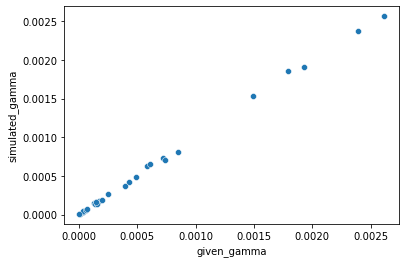

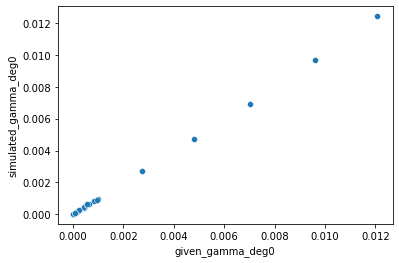

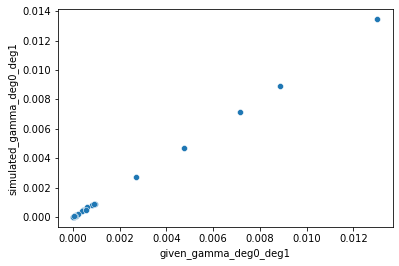

In [2]:
#######################
#### With mutators ####
#######################
probability = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/DEE/probability_stats.csv', index_col = 'Unnamed: 0', delimiter = '\t')
sns.scatterplot(data = probability.iloc[0:28].astype(float), x = 'given_gamma', y = 'simulated_gamma')
display(pearsonr(probability.iloc[0:28]['given_gamma'].astype(float), probability.iloc[0:28]['simulated_gamma'].astype(float)))
plt.figure()
sns.scatterplot(data = probability.iloc[0:28].astype(float), x = 'given_gamma_deg0', y = 'simulated_gamma_deg0')
display(pearsonr(probability.iloc[0:28]['given_gamma_deg0'].astype(float), probability.iloc[0:28]['simulated_gamma_deg0'].astype(float)))
plt.figure()
sns.scatterplot(data = probability.iloc[0:28].astype(float), x = 'given_gamma_deg0_deg1', y = 'simulated_gamma_deg0_deg1')
display(pearsonr(probability.iloc[0:28]['given_gamma_deg0_deg1'].astype(float), probability.iloc[0:28]['simulated_gamma_deg0_deg1'].astype(float)))

# ##########################
# #### With no mutators ####
# ##########################
# probability = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/DEE/probability_stats_nomutators.csv', index_col = 'Unnamed: 0', delimiter = '\t')
# sns.scatterplot(data = probability.iloc[0:28].astype(float), x = 'given_gamma', y = 'simulated_gamma')
# display(pearsonr(probability.iloc[0:28]['given_gamma'].astype(float), probability.iloc[0:28]['simulated_gamma'].astype(float)))
# plt.figure()
# sns.scatterplot(data = probability.iloc[0:28].astype(float), x = 'given_gamma_deg0', y = 'simulated_gamma_deg0')
# display(pearsonr(probability.iloc[0:28]['given_gamma_deg0'].astype(float), probability.iloc[0:28]['simulated_gamma_deg0'].astype(float)))
# plt.figure()
# sns.scatterplot(data = probability.iloc[0:28].astype(float), x = 'given_gamma_deg0_deg1', y = 'simulated_gamma_deg0_deg1')
# display(pearsonr(probability.iloc[0:28]['given_gamma_deg0_deg1'].astype(float), probability.iloc[0:28]['simulated_gamma_deg0_deg1'].astype(float)))

# Probabilistic model selection

## Akaike information criterion (AIC)

AIC = 2k - 2ln(L)

* L = log-likelihood estimate
* k = parameters (default = 2, every additional independent variable (n) = 2 + n)
* To compare models using AIC, you need to calculate the AIC of each model. If a model is more than 2 AIC units lower than another, then it is considered significantly better than that model.

In [37]:
#######################
#### With mutators ####
#######################
aic = pd.DataFrame(index = ['gamma', 'gamma+prop0', 'gamma+prop0+prop1'], columns = ['L', 'ln(L)', 'K', '2K - 2ln(L)'])
probability = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/DEE/probability_stats.csv', delimiter = '\t', index_col = 'Unnamed: 0')

#### Gamma distribution ####
aic.at['gamma', 'L'] = probability.at['total_probability', 'given_gamma']
aic.at['gamma', 'ln(L)'] = np.log(float(probability.at['total_probability', 'given_gamma']))
aic.at['gamma', 'K'] = 4
aic.at['gamma', '2K - 2ln(L)'] = 2*aic.at['gamma', 'K'] - 2*aic.at['gamma', 'ln(L)']

#### Gamma + 0 DEGs ####
aic.at['gamma+prop0', 'L'] = probability.at['total_probability', 'given_gamma_deg0']
aic.at['gamma+prop0', 'ln(L)'] = np.log(float(probability.at['total_probability', 'given_gamma_deg0']))
aic.at['gamma+prop0', 'K'] = 4
aic.at['gamma+prop0', '2K - 2ln(L)'] = 2*aic.at['gamma+prop0', 'K'] - 2*aic.at['gamma+prop0', 'ln(L)']

#### Gamma + 0 + 1 DEGs ####
aic.at['gamma+prop0+prop1', 'L'] = probability.at['total_probability', 'given_gamma_deg0_deg1']
aic.at['gamma+prop0+prop1', 'ln(L)'] = np.log(float(probability.at['total_probability', 'given_gamma_deg0_deg1']))
aic.at['gamma+prop0+prop1', 'K'] = 4
aic.at['gamma+prop0+prop1', '2K - 2ln(L)'] = 2*aic.at['gamma+prop0+prop1', 'K'] - 2*aic.at['gamma+prop0+prop1', 'ln(L)']

display(aic)

##########################
#### With no mutators ####
##########################
aic = pd.DataFrame(index = ['gamma', 'gamma+prop0', 'gamma+prop0+prop1'], columns = ['L', 'ln(L)', 'K', '2K - 2ln(L)'])
probability = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/DEE/probability_stats_nomutators.csv', delimiter = '\t', index_col = 'Unnamed: 0')

#### Gamma distribution ####
aic.at['gamma', 'L'] = probability.at['total_probability', 'given_gamma']
aic.at['gamma', 'ln(L)'] = np.log(float(probability.at['total_probability', 'given_gamma']))
aic.at['gamma', 'K'] = 4
aic.at['gamma', '2K - 2ln(L)'] = 2*aic.at['gamma', 'K'] - 2*aic.at['gamma', 'ln(L)']

#### Gamma + 0 DEGs ####
aic.at['gamma+prop0', 'L'] = probability.at['total_probability', 'given_gamma_deg0']
aic.at['gamma+prop0', 'ln(L)'] = np.log(float(probability.at['total_probability', 'given_gamma_deg0']))
aic.at['gamma+prop0', 'K'] = 4
aic.at['gamma+prop0', '2K - 2ln(L)'] = 2*aic.at['gamma+prop0', 'K'] - 2*aic.at['gamma+prop0', 'ln(L)']

#### Gamma + 0 + 1 DEGs ####
aic.at['gamma+prop0+prop1', 'L'] = probability.at['total_probability', 'given_gamma_deg0_deg1']
aic.at['gamma+prop0+prop1', 'ln(L)'] = np.log(float(probability.at['total_probability', 'given_gamma_deg0_deg1']))
aic.at['gamma+prop0+prop1', 'K'] = 4
aic.at['gamma+prop0+prop1', '2K - 2ln(L)'] = 2*aic.at['gamma+prop0+prop1', 'K'] - 2*aic.at['gamma+prop0+prop1', 'ln(L)']

display(aic)

,L,ln(L),K,2K - 2ln(L)
gamma,2.862892953645505e-102,-233.811847,4,475.623694
gamma+prop0,1.0504820412922042e-99,-227.906675,4,463.81335
gamma+prop0+prop1,1.1082166067623534e-99,-227.853172,4,463.706344


,L,ln(L),K,2K - 2ln(L)
gamma,6.506735953100078e-94,-214.570161,4,437.140322
gamma+prop0,8.98587221391669e-92,-209.642175,4,427.28435
gamma+prop0+prop1,2.1396814485370734e-91,-208.774587,4,425.549173


## Bayesian information criterion (BIC)

BIC = ln(n)k - 2ln(L)

* L = the maximized value of the likelihood function for the estimated model
* n = the number of data points
* k = the number of free parameters to be estimated

In [38]:
n = 28
k_gamma = 2
k_gamma_deg0 = 3
K_gamma_deg0_deg1 = 4

#######################
#### With mutators ####
#######################
bic = pd.DataFrame(index = ['gamma', 'gamma+prop0', 'gamma+prop0+prop1'], columns = ['L', 'ln(L)', 'K', 'ln(n)k - 2ln(L)'])
probability = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/DEE/probability_stats.csv', delimiter = '\t', index_col = 'Unnamed: 0')

#### Gamma distribution ####
bic.at['gamma', 'L'] = probability.at['total_probability', 'given_gamma']
bic.at['gamma', 'ln(L)'] = np.log(float(probability.at['total_probability', 'given_gamma']))
bic.at['gamma', 'K'] = 2
bic.at['gamma', 'ln(n)k - 2ln(L)'] = np.log(n)*bic.at['gamma', 'K'] - 2*aic.at['gamma', 'ln(L)']

#### Gamma + 0 DEGs ####
bic.at['gamma+prop0', 'L'] = probability.at['total_probability', 'given_gamma_deg0']
bic.at['gamma+prop0', 'ln(L)'] = np.log(float(probability.at['total_probability', 'given_gamma_deg0']))
bic.at['gamma+prop0', 'K'] = 3
bic.at['gamma+prop0', 'ln(n)k - 2ln(L)'] = np.log(n)*bic.at['gamma+prop0', 'K'] - 2*aic.at['gamma+prop0', 'ln(L)']

#### Gamma + 0 + 1 DEGs ####
bic.at['gamma+prop0+prop1', 'L'] = probability.at['total_probability', 'given_gamma_deg0_deg1']
bic.at['gamma+prop0+prop1', 'ln(L)'] = np.log(float(probability.at['total_probability', 'given_gamma_deg0_deg1']))
bic.at['gamma+prop0+prop1', 'K'] = 4
bic.at['gamma+prop0+prop1', 'ln(n)k - 2ln(L)'] = np.log(n)*bic.at['gamma+prop0+prop1', 'K'] - 2*aic.at['gamma+prop0+prop1', 'ln(L)']

display(bic)

##########################
#### With no mutators ####
##########################
bic = pd.DataFrame(index = ['gamma', 'gamma+prop0', 'gamma+prop0+prop1'], columns = ['L', 'ln(L)', 'K', 'ln(n)k - 2ln(L)'])
probability = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/DEE/probability_stats_nomutators.csv', delimiter = '\t', index_col = 'Unnamed: 0')

#### Gamma distribution ####
bic.at['gamma', 'L'] = probability.at['total_probability', 'given_gamma']
bic.at['gamma', 'ln(L)'] = np.log(float(probability.at['total_probability', 'given_gamma']))
bic.at['gamma', 'K'] = 2
bic.at['gamma', 'ln(n)k - 2ln(L)'] = np.log(n)*bic.at['gamma', 'K'] - 2*aic.at['gamma', 'ln(L)']

#### Gamma + 0 DEGs ####
bic.at['gamma+prop0', 'L'] = probability.at['total_probability', 'given_gamma_deg0']
bic.at['gamma+prop0', 'ln(L)'] = np.log(float(probability.at['total_probability', 'given_gamma_deg0']))
bic.at['gamma+prop0', 'K'] = 3
bic.at['gamma+prop0', 'ln(n)k - 2ln(L)'] = np.log(n)*bic.at['gamma+prop0', 'K'] - 2*aic.at['gamma+prop0', 'ln(L)']

#### Gamma + 0 + 1 DEGs ####
bic.at['gamma+prop0+prop1', 'L'] = probability.at['total_probability', 'given_gamma_deg0_deg1']
bic.at['gamma+prop0+prop1', 'ln(L)'] = np.log(float(probability.at['total_probability', 'given_gamma_deg0_deg1']))
bic.at['gamma+prop0+prop1', 'K'] = 4
bic.at['gamma+prop0+prop1', 'ln(n)k - 2ln(L)'] = np.log(n)*bic.at['gamma+prop0+prop1', 'K'] - 2*aic.at['gamma+prop0+prop1', 'ln(L)']

display(bic)

,L,ln(L),K,ln(n)k - 2ln(L)
gamma,2.862892953645505e-102,-233.811847,2,435.804731
gamma+prop0,1.0504820412922042e-99,-227.906675,3,429.280963
gamma+prop0+prop1,1.1082166067623534e-99,-227.853172,4,430.877991


,L,ln(L),K,ln(n)k - 2ln(L)
gamma,6.506735953100078e-94,-214.570161,2,435.804731
gamma+prop0,8.98587221391669e-92,-209.642175,3,429.280963
gamma+prop0+prop1,2.1396814485370734e-91,-208.774587,4,430.877991


# Plots of estimated DEE

## Negative binomial distribution

<AxesSubplot:xlabel='index', ylabel='proportion'>

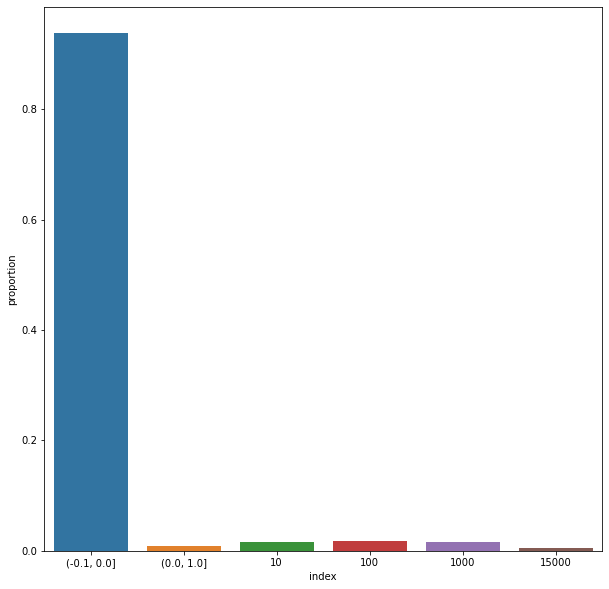

In [2]:
n = 0.008521
p = 0.000565
total = 7000000
dist1 = nbinom.rvs(n, p, loc = 0, size = total)

plt.figure(figsize = (10,10))

a1 = pd.DataFrame()
a1['degs'] = dist1
a1['bins'] = pd.cut(a1['degs'], bins= [-0.1, 0, 1, 10, 100, 1000, 15000])
a1['type'] = 'negative binomial' 
    
b1 = pd.DataFrame(index = a1['bins'].unique())
for i in a1['bins'].unique():
    b1.at[i, 'frequency'] = len(a1.loc[a1['bins'] == i])
    b1.at[i, 'proportion'] = b1.at[i, 'frequency']/total
b1['type'] = 'negative binomial'

b1 = b1.reset_index()
b1 = b1.replace(pd.Interval(-0.1, 0.01), '0').replace(pd.Interval(0.01, 1), '1').replace(pd.Interval(1, 10), '10').replace(pd.Interval(10, 100), '100').replace(pd.Interval(100, 1000), '1000').replace(pd.Interval(1000, 15000), '15000')

sns.barplot(data = b1, x = 'index', y = 'proportion')

In [3]:
b1

,index,frequency,proportion,type
0,"(-0.1, 0.0]",6566908.0,0.938130,negative binomial
1,100,128536.0,0.018362,negative binomial
2,"(0.0, 1.0]",56248.0,0.008035,negative binomial
3,1000,109527.0,0.015647,negative binomial
4,10,109452.0,0.015636,negative binomial
5,15000,29328.0,0.004190,negative binomial
6,NaN,0.0,0.000000,negative binomial


## Gamma distribution (loc = 0)

<AxesSubplot:xlabel='index', ylabel='proportion'>

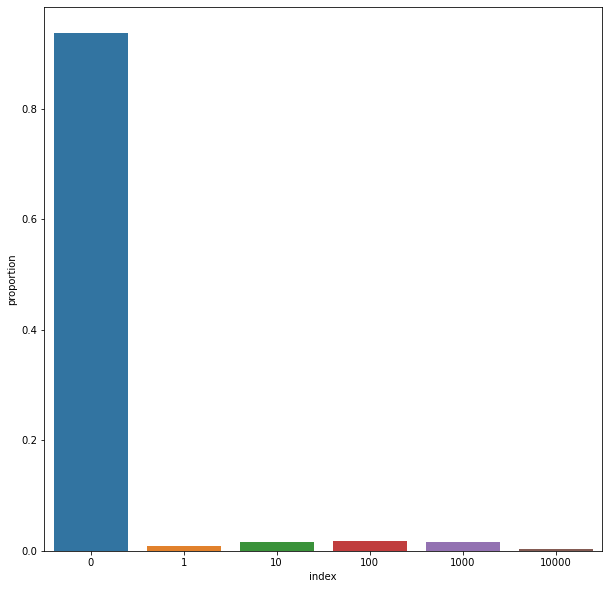

In [17]:
shape = 8.52497115e-03
scale = 1.76809511e+03
total = 7000000
dist1 = gamma.rvs(shape, loc = 0, scale = scale, size = 7000000)

plt.figure(figsize = (10,10))

a1 = pd.DataFrame()
a1['degs'] = dist1
a1['bins'] = pd.cut(a1['degs'], bins= [-0.1, 0.5, 1.5, 10.5, 100.5, 1000.5, 17000])
a1['type'] = 'gamma' 
    
b1 = pd.DataFrame(index = a1['bins'].unique())
for i in a1['bins'].unique():
    b1.at[i, 'frequency'] = len(a1.loc[a1['bins'] == i])
    b1.at[i, 'proportion'] = b1.at[i, 'frequency']/total
b1['type'] = 'gamma'

b1 = b1.reset_index()
b1 = b1.replace(pd.Interval(-0.1, 0.5), '0').replace(pd.Interval(0.5, 1.5), '1').replace(pd.Interval(1.5, 10.5), '10').replace(pd.Interval(10.5, 100.5), '100').replace(pd.Interval(100.5, 1000.5), '1000').replace(pd.Interval(1000.5, 17000), '10000')

sns.barplot(data = b1, x = 'index', y = 'proportion')

## Two distributions

DEE based on two distributions - one uniform and one gamma distribution

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

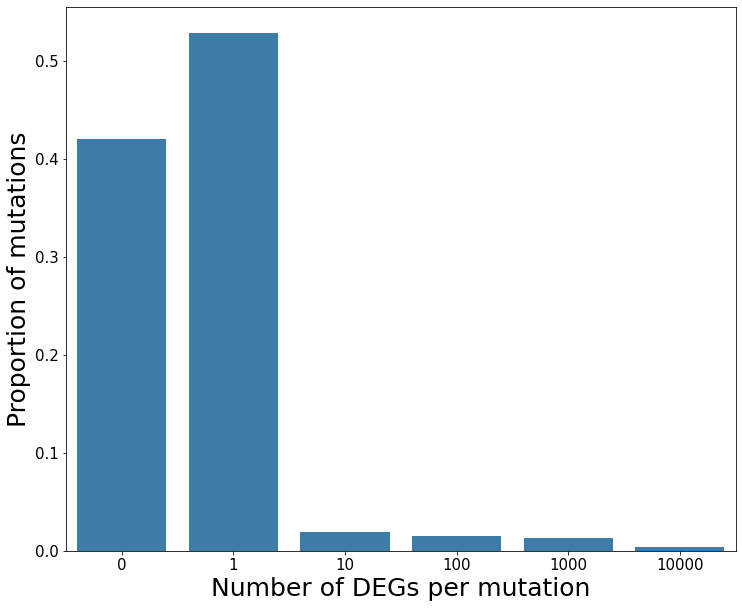

In [18]:
shape = 1.17992891e-02
scale = 2.00499698e+03
prop0 = 4.20446672e-01
total = 7000000

degs0 = round(total*prop0, 0)
array_degs0 = np.repeat(0, degs0)

dist = gamma.rvs(shape, loc = 1, scale = scale, size = int(total - degs0))
dist1 = np.concatenate([array_degs0, dist])

plt.figure(figsize = (12,10))

a2 = pd.DataFrame()
a2['degs'] = dist1
a2['bins'] = pd.cut(a2['degs'], bins= [-0.1, 0.5, 1.5, 10.5, 100.5, 1000.5, 17000])
a2['type'] = 'gamma + 0'

b2 = pd.DataFrame(index = a2['bins'].unique())
for i in a2['bins'].unique():
    b2.at[i, 'frequency'] = len(a2.loc[a2['bins'] == i])
    b2.at[i, 'proportion'] = b2.at[i, 'frequency']/total
b2['type'] = 'gamma + 0'

b2 = b2.reset_index()
b2 = b2.replace(pd.Interval(-0.1, 0.5), '0').replace(pd.Interval(0.5, 1.5), '1').replace(pd.Interval(1.5, 10.5), '10').replace(pd.Interval(10.5, 100.5), '100').replace(pd.Interval(100.5, 1000.5), '1000').replace(pd.Interval(1000.5, 17000), '10000')

sns.barplot(data = b2, x = 'index', y = 'proportion', color = '#2c7fb8')
plt.xlabel('Number of DEGs per mutation', fontsize = 25)
plt.ylabel('Proportion of mutations', fontsize = 25)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
# plt.savefig('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/DEE/gamma_dist_prop0.pdf', format = 'pdf', dpi = 600, bbox_inches = 'tight')

## Three distributions 

DEE based on three distributions - two uniform and one gamma distribution

<AxesSubplot:xlabel='index', ylabel='proportion'>

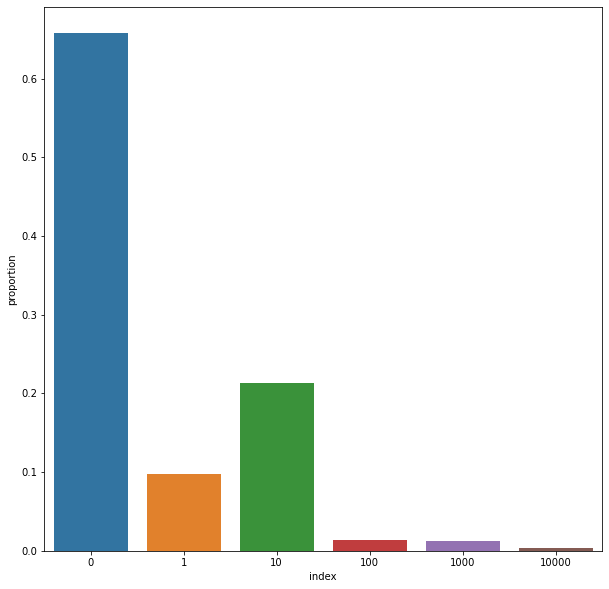

In [19]:
shape = 2.69870756e-02
scale = 2.20140307e+03
prop0 = 6.58096793e-01
prop1 = 9.82369846e-02
total = 7000000

degs0 = round(7000000*prop0, 0)
degs1 = round(7000000*prop1, 0)
array_degs0 = np.repeat(0, degs0)
array_degs1 = np.repeat(1, degs1)

dist = gamma.rvs(shape, loc = 2, scale = scale, size = int(7000000 - degs0 - degs1))

dist1 = np.concatenate([array_degs0, array_degs1, dist])

plt.figure(figsize = (10,10))

a3 = pd.DataFrame()
a3['degs'] = dist1
a3['bins'] = pd.cut(a3['degs'], bins= [-0.1, 0.5, 1.5, 10.5, 100.5, 1000.5, 17000])
a3['type'] = 'gamma + 0 + 1'

b3 = pd.DataFrame(index = a3['bins'].unique())
for i in a3['bins'].unique():
    b3.at[i, 'frequency'] = len(a3.loc[a3['bins'] == i])
    b3.at[i, 'proportion'] = b3.at[i, 'frequency']/total
b3['type'] = 'gamma + 0 + 1'

b3 = b3.reset_index()
b3 = b3.replace(pd.Interval(-0.1, 0.5), '0').replace(pd.Interval(0.5, 1.5), '1').replace(pd.Interval(1.5, 10.5), '10').replace(pd.Interval(10.5, 100.5), '100').replace(pd.Interval(100.5, 1000.5), '1000').replace(pd.Interval(1000.5, 17000), '10000')

sns.barplot(data = b3, x = 'index', y = 'proportion')

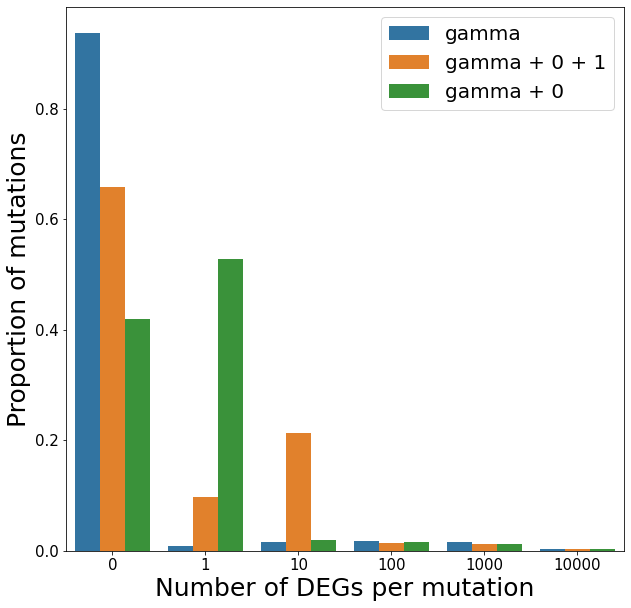

In [46]:
#### Combined histogram of all possible DEE ####
c = pd.concat([b1, b2, b3], axis = 0).dropna()
c = c.sort_values('index')

d = pd.DataFrame(index = c['index'].unique())
for i in c['index'].unique():
    d.at[i, 'avg_proportion'] = c.loc[c['index'] == i]['proportion'].mean()
    
d = d.reset_index()
plt.figure(figsize = (10, 10))
# sns.lineplot(c.loc[c['type'] == 'gamma'], x = 'index', y = 'proportion', linewidth = 5, color = sns.color_palette()[0])
# sns.lineplot(c.loc[c['type'] == 'gamma + 0'], x = 'index', y = 'proportion', linewidth = 5, color = sns.color_palette()[2])
# sns.lineplot(c.loc[c['type'] == 'gamma + 0 + 1'], x = 'index', y = 'proportion', linewidth = 5, color = sns.color_palette()[1])
sns.barplot(c, x = 'index', y = 'proportion', hue = 'type')
plt.xlabel('Number of DEGs per mutation', fontsize = 25)
plt.ylabel('Proportion of mutations', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc = 'best', fontsize = 20)
plt.savefig('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/DEE/combined_gamma_dist.pdf', format = 'pdf', dpi = 600, bbox_inches = 'tight')

## Simulating the average DEG count based on gamma distribution

In [3]:
%%R

N = 10000000
frac0 = 0.42
zeros = rep(0, frac0*N)
others = rgamma((1-frac0)*N, shape= 0.0118, scale=2005)+1
DEE = c(zeros, others)


# cc2344_mut_counts = c(398, 81, 63, 24, 69, 39, 45, 75, 27, 59, 45, 74, 49, 46, 53)
# cc2931_mut_counts = c(89, 124, 52, 100, 339, 85, 73, 112, 87, 88, 97, 79, 141)
# total_mut_counts = c(cc2344_mut_counts, cc2931_mut_counts)
total_mut_counts = c(398, 59, 45, 74, 49, 46, 53, 81, 63, 24, 69, 39, 45, 75, 27, 89, 87, 88, 97, 79, 141, 124, 52, 100, 339, 85, 73, 112)
# The parameters are 0.0118, 2005, 0.42 


mean_DEGs = c()
for (m in total_mut_counts) {
    DEG_count = c()
    for (i in seq(0,1000)) {
        DEGs = sum(sample(DEE, m, replace = TRUE))
        DEG_count <- c(DEG_count, DEGs)
     }
    mean_DEGs <- c(mean_DEGs, mean(DEG_count))
}

mean_DEGs

 [1] 5625.1550  844.5527  664.3577 1099.4986  697.9372  674.0692  774.1332
 [8] 1214.3837  903.7158  366.8198  960.5995  597.5474  614.7809 1059.3598
[15]  349.8563 1257.7553 1248.0877 1288.5139 1456.3142 1165.5995 2023.9724
[22] 1793.7230  709.7683 1428.2347 4956.5393 1111.7070 1058.6139 1655.4518


## Correlation between simulated mutation and DEG count

The mutation count was picked at random from a range of 0 - 400, and the number of DEGs for each mutation was retrived from the DEE (distribution of expression effects)

In [29]:
ma_lines = ['maline_' + str(i + 1) for i in range(28)]
num_mut = 401
trials = 100000
rcorr_4params = {}

#### Gamma distribution four parameters ####
shape = 2.69870756e-02
scale = 2.20140307e+03
prop0 = 6.58096793e-01
prop1 = 9.82369846e-02

for i in range(trials):
    dic = {}
    for maline in ma_lines:
        mut = random.randint(0, num_mut) ### assigned random number of mutations per maline
        degs0 = round(mut*prop0)
        degs1 = round(mut*prop1)
        array_degs0 = np.repeat(0, degs0)
        array_degs1 = np.repeat(1, degs1)
        gamma_dist = gamma.rvs(shape, loc = 2, scale = scale, size = mut - degs0 - degs1) ### DEGs drawn from DEE based on mutation count
        gamma_dist = np.round(gamma_dist)
        degs = np.concatenate([array_degs0, array_degs1, gamma_dist])
        dic[mut] = sum(degs)
    rcorr_4params[str(i + 1)] = [scipy.stats.pearsonr(list(dic.keys()), list(dic.values()))[0], scipy.stats.pearsonr(list(dic.keys()), list(dic.values()))[1]]
    
############################################################################################################################

rcorr_3params = {}

#### Gamme distribution three parameters ####
shape = 1.17992891e-02
scale = 2.00499698e+03
prop0 = 4.20446672e-01

for i in range(trials):
    dic = {}
    for maline in ma_lines:
        mut = random.randint(0, num_mut) ### assigned random number of mutations per maline
        degs0 = round(mut*prop0, 0)
        array_degs0 = np.repeat(0, degs0)
        gamma_dist = gamma.rvs(shape, loc = 1, scale = scale, size = int(mut - degs0)) ### DEGs drawn from DEE based on mutation count
        gamma_dist = np.round(gamma_dist, 0)
        degs = np.concatenate([array_degs0, gamma_dist])
        dic[mut] = sum(degs)
    rcorr_3params[str(i + 1)] = [scipy.stats.pearsonr(list(dic.keys()), list(dic.values()))[0], scipy.stats.pearsonr(list(dic.keys()), list(dic.values()))[1]]
    
############################################################################################################################

rcorr_2params = {}

#### Gamma distribution ####
shape = 8.52497115e-03
scale = 1.76809511e+03

for i in range(trials):
    dic = {}
    for maline in ma_lines:
        mut = random.randint(0, num_mut) ### assigned random number of mutations per maline
        degs = gamma.rvs(shape, loc = 0, scale = scale, size = mut) ### DEGs drawn from DEE based on mutation count
        degs = np.round(degs, 0)
        dic[mut] = sum(degs)
    rcorr_2params[str(i + 1)] = [scipy.stats.pearsonr(list(dic.keys()), list(dic.values()))[0], scipy.stats.pearsonr(list(dic.keys()), list(dic.values()))[1]]

In [30]:
count = 0
for col in rcorr_2params.values():
    if (col[0] >= 0.3) and (col[1] < 0.05):
        count += 1
        
display(count/trials)

count = 0
for col in rcorr_3params.values():
    if (col[0] >= 0.3) and (col[1] < 0.05):
        count += 1
        
display(count/trials)

count = 0
for col in rcorr_4params.values():
    if (col[0] >= 0.3) and (col[1] < 0.05):
        count += 1
        
display(count/trials)

0.96412

0.94421

0.93687

In [24]:
ma_lines = ['maline_' + str(i + 1) for i in range(300)]
num_mut = 401
trials = 1000
rcorr_4params = {}

#### Gamma distribution four parameters ####
shape = 2.69870756e-02
scale = 2.20140307e+03
prop0 = 6.58096793e-01
prop1 = 9.82369846e-02

for i in range(trials):
    dic = {}
    for maline in ma_lines:
        mut = random.randint(0, num_mut) ### assigned random number of mutations per maline
        degs0 = round(mut*prop0)
        degs1 = round(mut*prop1)
        array_degs0 = np.repeat(0, degs0)
        array_degs1 = np.repeat(1, degs1)
        gamma_dist = gamma.rvs(shape, loc = 2, scale = scale, size = mut - degs0 - degs1) ### DEGs drawn from DEE based on mutation count
        gamma_dist = np.round(gamma_dist)
        degs = np.concatenate([array_degs0, array_degs1, gamma_dist])
        dic[mut] = sum(degs)
    rcorr_4params[str(i + 1)] = [scipy.stats.pearsonr(list(dic.keys()), list(dic.values()))[0], scipy.stats.pearsonr(list(dic.keys()), list(dic.values()))[1]]
    
############################################################################################################################

rcorr_3params = {}

#### Gamme distribution three parameters ####
shape = 1.17992891e-02
scale = 2.00499698e+03
prop0 = 4.20446672e-01

for i in range(trials):
    dic = {}
    for maline in ma_lines:
        mut = random.randint(0, num_mut) ### assigned random number of mutations per maline
        degs0 = round(mut*prop0, 0)
        array_degs0 = np.repeat(0, degs0)
        gamma_dist = gamma.rvs(shape, loc = 1, scale = scale, size = int(mut - degs0)) ### DEGs drawn from DEE based on mutation count
        gamma_dist = np.round(gamma_dist, 0)
        degs = np.concatenate([array_degs0, gamma_dist])
        dic[mut] = sum(degs)
    rcorr_3params[str(i + 1)] = [scipy.stats.pearsonr(list(dic.keys()), list(dic.values()))[0], scipy.stats.pearsonr(list(dic.keys()), list(dic.values()))[1]]
    
############################################################################################################################

rcorr_2params = {}

#### Gamma distribution ####
shape = 8.52497115e-03
scale = 1.76809511e+03

for i in range(trials):
    dic = {}
    for maline in ma_lines:
        mut = random.randint(0, num_mut) ### assigned random number of mutations per maline
        degs = gamma.rvs(shape, loc = 0, scale = scale, size = mut) ### DEGs drawn from DEE based on mutation count
        degs = np.round(degs, 0)
        dic[mut] = sum(degs)
    rcorr_2params[str(i + 1)] = [scipy.stats.pearsonr(list(dic.keys()), list(dic.values()))[0], scipy.stats.pearsonr(list(dic.keys()), list(dic.values()))[1]]
    
    
count = 0
for col in rcorr_2params.values():
    if (col[0] >= 0.3) and (col[1] < 0.05):
        count += 1
        
display(count/trials)

count = 0
for col in rcorr_3params.values():
    if (col[0] >= 0.3) and (col[1] < 0.05):
        count += 1
        
display(count/trials)

count = 0
for col in rcorr_4params.values():
    if (col[0] >= 0.3) and (col[1] < 0.05):
        count += 1
        
display(count/trials)

1.0

1.0

1.0

In [27]:
rcorr_4params

{'1': [0.5703042744099239, 2.174811760763661e-18],
 '2': [0.586110921884395, 7.391792243967062e-21],
 '3': [0.5517402917916868, 6.916320449729576e-18],
 '4': [0.5744876755922261, 6.314743931541079e-20],
 '5': [0.5646766551308974, 9.561555602748372e-19],
 '6': [0.5822348507117557, 1.8813619677615234e-20],
 '7': [0.5958576706204751, 1.3103217715854575e-20],
 '8': [0.5243877312535385, 7.182698192007739e-17],
 '9': [0.5344358543012122, 4.676311351724316e-17],
 '10': [0.5812705620566176, 2.769026851501354e-20],
 '11': [0.5266345935062342, 5.0206222954970235e-17],
 '12': [0.6072443064281484, 4.802685897538611e-22],
 '13': [0.5684172936778091, 7.461028747498259e-19],
 '14': [0.5588226942780088, 1.5000463230365952e-19],
 '15': [0.5958556860695193, 3.026885835399712e-22],
 '16': [0.5225755998743986, 1.8275122067773135e-16],
 '17': [0.5010847178921243, 3.933099649283037e-15],
 '18': [0.6066868416720489, 2.717922214726895e-21],
 '19': [0.5581804903013847, 4.329317183150126e-19],
 '20': [0.5486116

Using the observed mutation counts from MA (mutation accumulation) study and retrieving the correlation between mutation/DEG counts

In [31]:
all_mutations = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/all_mutations.csv', delimiter = '\t')
mut = []
for i in all_mutations['sample'].unique():
    mutations = all_mutations.loc[all_mutations['sample'] == i].count()[0]
    mut.append(mutations)

ma_lines = ['maline_' + str(i + 1) for i in range(28)]
trials = 100000
rcorr_4params = {}

#### Gamma distribution four parameters ####
shape = 2.69870756e-02
scale = 2.20140307e+03
prop0 = 6.58096793e-01
prop1 = 9.82369846e-02

for i in range(trials):
    dic = {}
    for m in mut:
        degs0 = round(m*prop0) ## number of mutations that cause 0 degs
        degs1 = round(m*prop1) ## number of mutations that cause 1 deg
        array_degs0 = np.repeat(0, degs0)
        array_degs1 = np.repeat(1, degs1)
        gamma_dist = gamma.rvs(shape, loc = 2, scale = scale, size = int(m - degs0 - degs1)) ### DEGs drawn from DEE based on remaining mutations
        gamma_dist = np.round(gamma_dist, 0)
        degs = np.concatenate([array_degs0, array_degs1, gamma_dist])
        dic[m] = sum(degs)
    rcorr_4params[str(i + 1)] = [scipy.stats.pearsonr(list(dic.keys()), list(dic.values()))[0], scipy.stats.pearsonr(list(dic.keys()), list(dic.values()))[1]]
rcorr_4params

###########################################################################################################################

rcorr_3params = {}

#### Gamme distribution with additional parameter (0 degs) ####
shape = 1.17992891e-02
scale = 2.00499698e+03
prop0 = 4.20446672e-01

for i in range(trials):
    dic = {}
    for m in mut:
        degs0 = round(m*prop0)
        array_degs0 = np.repeat(0, degs0)
        gamma_dist = gamma.rvs(shape, loc = 1, scale = scale, size = int(m - degs0)) ### DEGs drawn from DEE based on mutation count
        gamma_dist = np.round(gamma_dist, 0)
        degs = np.concatenate([array_degs0, gamma_dist])
        dic[m] = sum(degs)
    rcorr_3params[str(i + 1)] = [scipy.stats.pearsonr(list(dic.keys()), list(dic.values()))[0], scipy.stats.pearsonr(list(dic.keys()), list(dic.values()))[1]]
    
rcorr_3params
############################################################################################################################

rcorr_2params = {}

#### Gamma distribution ####
shape = 8.52497115e-03
scale = 1.76809511e+03

for i in range(trials):
    dic = {}
    for m in mut:
        degs = gamma.rvs(shape, loc = 0, scale = scale, size = m) ### DEGs drawn from DEE based on mutation count
        degs = np.round(degs, 0)
        dic[m] = sum(degs)
    rcorr_2params[str(i + 1)] = [scipy.stats.pearsonr(list(dic.keys()), list(dic.values()))[0], scipy.stats.pearsonr(list(dic.keys()), list(dic.values()))[1]]
rcorr_2params

{'1': [0.715507722188707, 2.7261890521795508e-05],
 '2': [0.7042045372323744, 4.1420918183469164e-05],
 '3': [0.7366457478698814, 1.1798282166608746e-05],
 '4': [0.5302295397074237, 0.0044424327810248364],
 '5': [0.4296299282627352, 0.0253165581823469],
 '6': [0.7503243520111301, 6.5737670679529745e-06],
 '7': [0.8635918103481388, 6.635571591821344e-09],
 '8': [0.6413720426097621, 0.000311854645875177],
 '9': [0.7221120109733438, 2.1154994756882225e-05],
 '10': [0.4480854337665079, 0.01908003727099297],
 '11': [0.24597271611815105, 0.21618296020745528],
 '12': [0.8632722015888742, 6.820207255240283e-09],
 '13': [0.4432470034399876, 0.02057791629278947],
 '14': [0.8864153108057029, 7.650080188559268e-10],
 '15': [0.8126851223354286, 2.611887482452274e-07],
 '16': [0.8153150729805724, 2.2223185038803425e-07],
 '17': [0.6640026117173947, 0.00015905053181706878],
 '18': [0.6120486170621604, 0.0006918220357076205],
 '19': [0.8059758119646263, 3.900269461164013e-07],
 '20': [0.29605478191152

In [36]:
count = 0
for col in rcorr_2params.values():
    if (col[0] >= 0.3) and (col[1] < 0.05):
        count += 1
        
display(count/trials)

count = 0
for col in rcorr_3params.values():
    if (col[0] >= 0.3) and (col[1] < 0.05):
        count += 1
        
display(count/trials)

count = 0
for col in rcorr_4params.values():
    if (col[0] >= 0.3) and (col[1] < 0.05):
        count += 1
        
display(count/trials)

0.90145

0.86969

0.85837